>> Bibliotecas

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/Energy_consumption.csv')

In [5]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


>> ## Seleção

In [6]:
df_numerico = df.select_dtypes(include=['int64', 'float64'])

In [7]:
df_numerico.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732


In [10]:
X=df_numerico.drop('EnergyConsumption', axis=1)

In [11]:
X.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy
0,25.139433,43.431581,1565.693999,5,2.774699
1,27.731651,54.225919,1411.064918,1,21.831384
2,28.704277,58.907658,1755.715009,2,6.764672
3,20.080469,50.371637,1452.316318,1,8.623447
4,23.097359,51.401421,1094.130359,9,3.071969


>> ## Análise

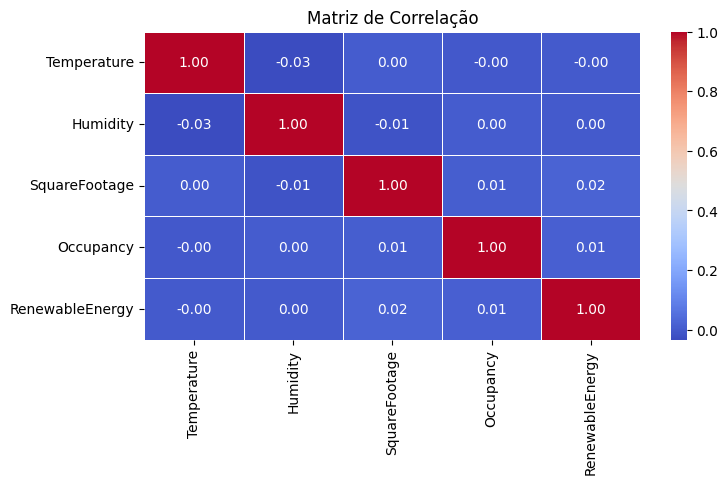

In [28]:
correlacao = X.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

>>## Transformação

In [13]:
y = df_numerico['EnergyConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

>> ## Predição (regressão)

>>> Determinação do n. de vizinhos próximos

Melhor valor de k: 19
Erro médio para o melhor k: 34.61755686773133


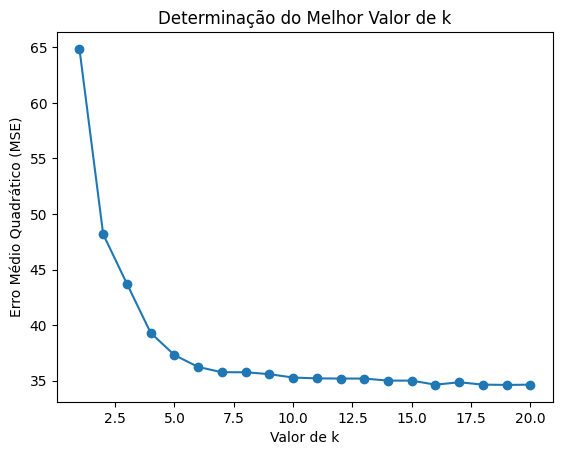

In [17]:
from sklearn.model_selection import cross_val_score
k_values = range(1, 21)
mean_errors = []

for k in k_values:

    knn_model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_errors.append(-scores.mean())

best_k = k_values[np.argmin(mean_errors)]
print(f"Melhor valor de k: {best_k}")
print(f"Erro médio para o melhor k: {min(mean_errors)}")
plt.plot(k_values, mean_errors, marker='o')
plt.xlabel("Valor de k")
plt.ylabel("Erro Médio Quadrático (MSE)")
plt.title("Determinação do Melhor Valor de k")
plt.show()

In [23]:
k = best_k
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=19)

>> ## Avaliação e Validação

In [24]:
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Médio Quadrático (MSE): {mse}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Coeficiente de Determinação (R²): {r2}")

Erro Médio Quadrático (MSE): 35.30283399984789
Erro Médio Absoluto (MAE): 4.746466808553165
Coeficiente de Determinação (R²): 0.4610244109555499


O coeficiente de determinação R^2, ou R-quadrado, é uma métrica que mede a qualidade do ajuste de um modelo de regressão aos dados observados. Ele indica a proporção da variância da variável dependente que é explicada pelas variáveis independentes no modelo. Em outras palavras, R^2 nos mostra quão bem os dados se ajustam ao modelo.

Interpretação de  R^2

**R^2 = 1:** Indica que o modelo explica perfeitamente toda a variabilidade dos dados, ou seja, todos os pontos caem exatamente na linha de regressão.

**R^2 = 0:** Indica que o modelo não consegue explicar nenhuma variabilidade dos dados, sendo equivalente a um ajuste apenas pela média dos dados.

**0< R^2 <1**: Indica que o modelo explica parcialmente a variabilidade dos dados.

**R2 < 0:** Indica que o modelo é pior que uma simples linha horizontal (média dos valores observados) e, neste caso, o modelo tem um ajuste muito ruim.


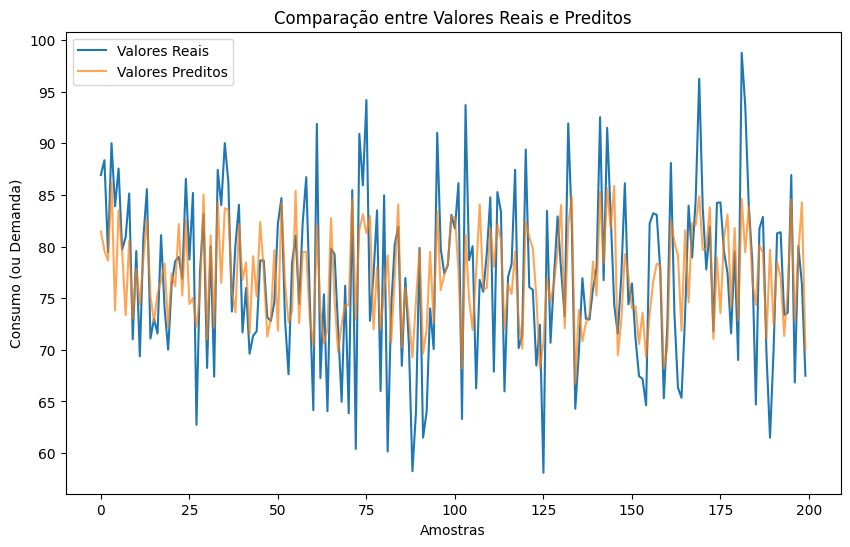

In [25]:
# Visualizar a comparação entre valores reais e preditos
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Valores Preditos', alpha=0.7)
plt.title("Comparação entre Valores Reais e Preditos")
plt.xlabel("Amostras")
plt.ylabel("Consumo (ou Demanda)")
plt.legend()
plt.show()